## Table of Contents

- Task 1: [Posing an interesting analytical question relevant to the chosen dataset](#task-1)
- Task 2.1: [Exploratory data analysis](#task-2.1)
- Task 2.2: [Data pre-processing (such as, data cleaning, data transformation etc.)](#task-2.2)
- Task 2.3: [Statistics/computation-based data analytics](#task-2.3)
- Task 2.4: [Visualisations of the key results](#task-2.4)
- Task 3: [Critical reflection report](#task-3)

## **Overview**
Online shopping has grown in popularity over the years, mainly because people find it convenient and easy to bargain shop from the comfort of their homes or offices. One of the most enticing factors about online shopping, particularly during the holiday season, is it alleviates the need to wait in long lines or search from store to store for a particular item. Thus, the need to best understand the customers.
In this investigation, I look at the features of the superstore that can help us maximize revenue leading to increased profit. The main focus was on customer segments and how they differ in revenue and profit over the years and months.


## Metedata
- **Row ID:** Unique ID for each row.
- **Order ID:** Unique Order ID for each Customer.
- **Order Date:** Order Date of the product.
- **Ship Date:** Shipping Date of the Product.
- **Ship Mod:** Shipping Mode specified by the Customer.
- **Customer ID:** Unique ID to identify each Customer.
- **Customer Name:** Name of the Customer.
- **Segment:** The segment where the Customer belongs.
- **Country:** Country of residence of the Customer.
- **City:** City of residence of of the Customer.
- **State:** State of residence of the Customer.
- **Postal Code:** Postal Code of every Customer.
- **Region:** Region where the Customer belong.
- **Product ID:** Unique ID of the Product.
- **Category:** Category of the product ordered.
- **Sub-Category:** Sub-Category of the product ordered.
- **Product Name:** Name of the Product.
- **Sales:** Sales of the Product.
- **Quantity:** Quantity of the Product.
- **Discount:** Discount provided.
- **Profit:** Profit/Loss incurred.

## Import Libraries

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id = "task-1"></a>
## **Task 1:** Posing an interesting analytical question relevant to the chosen dataset
> Which customer segment should we focus more on in order to improve sales while not raising costs very much, leading to increased profit margins?.

## Load in the data and specify the encoding

In [4]:
df = pd.read_csv("../input/superstore-csv/Superstore.csv", encoding='cp1252')
print(df.shape)
df.sample(10)

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8369,8370,CA-2016-118745,6/11/2016,6/16/2016,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Los Angeles,...,90049,West,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,902.712,3,0.2,33.8517
878,879,US-2014-158638,9/17/2014,9/21/2014,Standard Class,AG-10765,Anthony Garverick,Home Office,United States,Philadelphia,...,19120,East,OFF-BI-10003712,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",5.892,4,0.7,-4.1244
975,976,US-2017-103247,10/5/2017,10/8/2017,Second Class,PO-19195,Phillina Ober,Home Office,United States,New York City,...,10011,East,OFF-BI-10004492,Office Supplies,Binders,Tuf-Vin Binders,75.792,3,0.2,25.5798
6127,6128,CA-2016-124100,3/31/2016,4/6/2016,Standard Class,EH-13990,Erica Hackney,Consumer,United States,New York City,...,10009,East,FUR-CH-10003817,Furniture,Chairs,"Global Value Steno Chair, Gray",327.996,6,0.1,54.6660
930,931,CA-2017-144932,4/14/2017,4/17/2017,First Class,AB-10165,Alan Barnes,Consumer,United States,Toledo,...,43615,East,OFF-AR-10001468,Office Supplies,Art,Sanford Prismacolor Professional Thick Lead Ar...,89.856,3,0.2,21.3408
9392,9393,CA-2015-130848,10/25/2015,10/25/2015,Same Day,DG-13300,Deirdre Greer,Corporate,United States,Denver,...,80219,West,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,582.336,8,0.2,-29.1168
9359,9360,CA-2016-168046,1/25/2016,1/28/2016,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.980,1,0.0,7.8166
4074,4075,CA-2017-108112,11/15/2017,11/20/2017,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Miramar,...,33023,South,FUR-FU-10003553,Furniture,Furnishings,"Howard Miller 13-1/2"" Diameter Rosebrook Wall ...",220.064,4,0.2,55.0160
2808,2809,CA-2015-148635,7/25/2015,7/27/2015,Second Class,MH-18025,Michelle Huthwaite,Consumer,United States,Seattle,...,98115,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",704.900,5,0.0,56.3920
7489,7490,CA-2017-157196,11/5/2017,11/9/2017,Standard Class,AA-10645,Anna Andreadi,Consumer,United States,San Diego,...,92105,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.960,2,0.0,6.2208


**Note:** 
- The encoding must be specified or esle the code will throw an error like this `utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte`

- Another method is to re-encode the file as utf-8 and save for re-usability buy running the cell below

In [4]:
import codecs
BLOCKSIZE = 1048576 # or some other, desired size in bytes
with codecs.open("../input/superstore-csv/Superstore.csv", "r") as sourceFile:
    # Save as new file 
    with codecs.open("./Superstore2.csv", "w", "utf-8") as targetFile:
        while True:
            contents = sourceFile.read(BLOCKSIZE)
            if not contents:
                break
            targetFile.write(contents)

<a id = "task-2.1"></a>
## **Task-2.1:** Exploratory Data Analysis

In [5]:
## See how column names were written
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### The columns' naming convention doesn't follow the best practice. Also, having spaces in between column names makes it difficult to be referenced.

In [6]:
## Check for duplicate records
df.duplicated().sum()

0

In [7]:
## Check for total unique and duplicate order id to know if customers buy more than a single product at a time
print(f"Unique order id: {df['Order ID'].nunique()}")
print(f"Duplicate order id: {df['Order ID'].duplicated().sum()}")

Unique order id: 5009
Duplicate order id: 4985


In [8]:
## Check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
## Have overview of the data; total observations and features, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#### There are issues with data types, and will be corrected later

In [10]:
## View columns with the object data type only
df.select_dtypes("object").head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [11]:
## Seems `Country` has only one unique value
df["Country"].unique()

array(['United States'], dtype=object)

In [12]:
## Other columns like 'Ship Mode', 'Segment', and 'Region' seem to have small number of unique values

print(f"Regions: {df['Region'].unique()}")
print(f"Segments: {df['Segment'].unique()}")
print(f"Ship Modes: {df['Ship Mode'].unique()}")

Regions: ['South' 'West' 'Central' 'East']
Segments: ['Consumer' 'Corporate' 'Home Office']
Ship Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


#### This is to check for categorical variables with either one unique value like "Counrty" or too many unique values like "City". Both are not good for analysis unless it is recategorized. It is best when a feature has good unique values.

In [13]:
## generate descriptive statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### A key observation here is seeing a high discount, as high as 0.8 and a negative profit, which may be due to the discount. I would explore more...I hypothesized that they must have been used for marketing purposes.

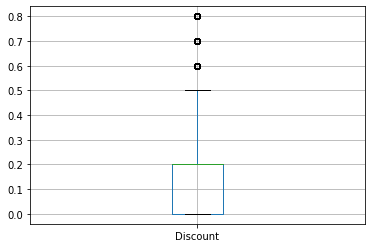

In [14]:
## Check the distribution of profit

df.boxplot(column = ["Discount"]);

In [15]:
## count the number of occurence for each discount
df.Discount.value_counts().sort_index()

0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: Discount, dtype: int64

In [16]:
## Calculate the total quantities for each discount
df[["Discount", "Quantity"]].groupby("Discount").sum()

,Quantity
Discount,
0.00,18267
0.10,373
0.15,198
0.20,13660
0.30,849
0.32,105
0.40,786
0.45,45
0.50,241


In [17]:
## Subset dataframe where profit is less than zero
df_low_profit = df.query("Profit < 0")
df_low_profit.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
28,29,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.6180,2,0.70,-7.0532
32,33,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.8580,6,0.70,-5.7150
36,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
38,39,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
39,40,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.0580,3,0.30,-15.1470


In [18]:
df_low_profit[["Discount", "Quantity"]].groupby("Discount").sum()

,Quantity
Discount,
0.10,14
0.15,50
0.20,1799
0.30,773
0.32,105
0.40,664
0.45,45
0.50,241
0.60,501


#### Increased discount is directly correlated to low profit. In fact, from 0.5 upward, all the products accumulated loss and no gain. They must have been used for promo. Thus, not be used in this analysis

## Data Quality Issues To Deal With
- Rename the columns
- Correct data types
- Drop extraneous column
- Create other columns to be used for this analysis

<a id= "task-2.2"></a>
## **Task 2.2:** Data pre-processing (such as, data cleaning, data transformation etc.)

In [19]:
# replace spaces / hyphen with underscores and lowercase labels
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

# Confirm changes
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [20]:
## Drop Extraneous Columns
to_drop = ["row_id", "country", "postal_code", "product_id", "ship_date", "customer_id"]
df_store = df.drop(columns = to_drop)

# Confirm changes
df_store.head()

,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_mode      9994 non-null   object 
 3   customer_name  9994 non-null   object 
 4   segment        9994 non-null   object 
 5   city           9994 non-null   object 
 6   state          9994 non-null   object 
 7   region         9994 non-null   object 
 8   category       9994 non-null   object 
 9   sub_category   9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  sales          9994 non-null   float64
 12  quantity       9994 non-null   int64  
 13  discount       9994 non-null   float64
 14  profit         9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


In [22]:
# Conver order_date ti datetime format
df_store["order_date"] = pd.to_datetime(df_store["order_date"])

# Create features that are useful for this analysis
df_store["year"] = df_store["order_date"].dt.year
df_store["month"] = df_store["order_date"].dt.month
df_store["date"] = df_store["order_date"].dt.day

# Confirm changes
df_store.head()

,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,year,month,date
0,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,CA-2016-138688,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


In [23]:
## Convert year, month and days into an ordinal variable

y_order = np.sort(df_store.year.unique())
m_order = list(range(1,13,1))
d_order = list(range(1,32,1))

y_order = pd.api.types.CategoricalDtype(ordered = True, categories = y_order)
m_order = pd.api.types.CategoricalDtype(ordered = True, categories = m_order)
d_order = pd.api.types.CategoricalDtype(ordered = True, categories = d_order)

df_store['year'] = df_store['year'].astype(y_order)
df_store['month'] = df_store['month'].astype(m_order)
df_store['date'] = df_store['date'].astype(d_order)

#confirm changes
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_mode      9994 non-null   object        
 3   customer_name  9994 non-null   object        
 4   segment        9994 non-null   object        
 5   city           9994 non-null   object        
 6   state          9994 non-null   object        
 7   region         9994 non-null   object        
 8   category       9994 non-null   object        
 9   sub_category   9994 non-null   object        
 10  product_name   9994 non-null   object        
 11  sales          9994 non-null   float64       
 12  quantity       9994 non-null   int64         
 13  discount       9994 non-null   float64       
 14  profit         9994 non-null   float64       
 15  year           9994 n

In [24]:
## Sub-set only observations where the profit is greater than 0

mask = df_store["profit"] > 0
df_clean = df_store[mask]
print(df_clean.shape)
df_clean.head()

(8058, 18)


,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,year,month,date
0,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,11,8
1,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2016,11,8
2,CA-2016-138688,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016,6,12
4,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015,10,11
5,CA-2014-115812,2014-06-09,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2014,6,9


In [25]:
## Check for the descriptive statistics
df_clean.describe()

,sales,quantity,discount,profit
count,8058.000000,8058.000000,8058.000000,8058.000000
mean,223.480623,3.794738,0.081044,54.917884
std,600.340641,2.244696,0.098884,213.713980
min,0.990000,1.000000,0.000000,0.062800
25%,17.940000,2.000000,0.000000,5.324550
50%,50.965000,3.000000,0.000000,13.317600
75%,191.976000,5.000000,0.200000,40.465550
max,17499.950000,14.000000,0.400000,8399.976000


#### However, I'll still use the df_store analysis so that I take into consideration money spent on advertisement or customer acquisition

<a id= "task-2.3"></a>
<a id= "task-2.4"></a>
## **Task 2.3:** Statistics/computation-based data analytics
## **Task 2.4:** Visualisations of the key results

#### I've joined these two tasks together to make it more explanatory, as two of them are complimentary

### ASK: 
- Which is the most common customer segment
- Is profit directly proportional to revenue

In [36]:
# Get the value count for each segment
segments = df_store['segment'].value_counts()
segments

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

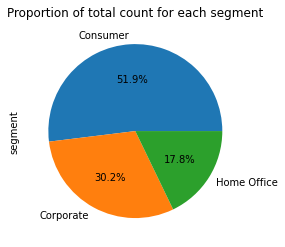

In [51]:
## Visialize their proportion
segments.plot.pie(autopct="%1.1f%%")
plt.title("Proportion of total count for each segment");

In [29]:
## Calculation the total sales for each segment

sales = df_store[["sales", "segment", "month"]]
df_sales = sales.groupby("segment").sum()
df_sales

,sales
segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


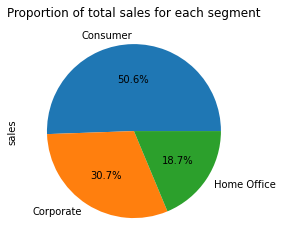

In [52]:
df_sales["sales"].plot.pie(autopct = "%1.1f%%")
plt.title("Proportion of total sales for each segment");

In [32]:
# Calculate the total profit for each segment
profit = df_store[["profit", "segment", "month"]]
df_profit = profit.groupby("segment").sum()
df_profit

,profit
segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


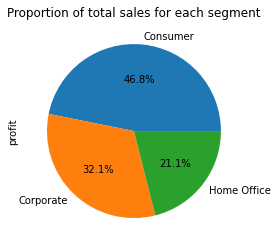

In [57]:
df_profit["profit"].plot.pie(autopct = "%1.1f%%")
plt.title("Proportion of total sales for each segment");

In [34]:
sales_profit = df_store[["sales", "profit", "segment", "month", "year"]]
df_sales_profit = sales_profit.groupby("segment").sum().reset_index()
df_sales_profit

,segment,sales,profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


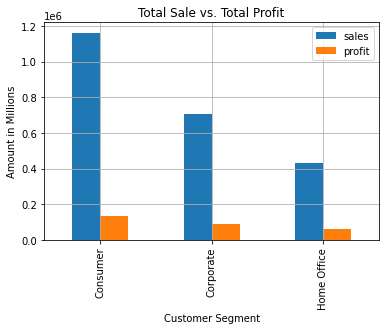

In [55]:
## View this in a bar chart
df_sales_profit.plot(kind = "bar", x = "segment", y = ["sales", "profit"]);
plt.grid()
plt.xlabel("Customer Segment")
plt.ylabel("Amount in Millions")
plt.title("Total Sale vs. Total Profit");

**Finding:**
Casual buyers are the most common and account for more than half of the customer segment (51.9%), While customers with the label "Home office" are the least as they account for just 17.8% of the total buyers. However, something is interesting to note, the percentage decrease for the customer (casual buyers) segment moving from total count to sales and then to profit - the ultimate goal of any business. The percentage for the other two categories increases with a huge increment for the home office. Therefore, to increase profit, it will be a good strategy to convert casual buyers into home-office or corporate buyers.

ASK:
- What has been the trend over the years?
- How does an increase in sales affect profit for each segment?

In [38]:
## Group by segments and months
anual_sales_profit = sales_profit.groupby(["segment", "year"]).sum()

## split the rows using their index
consumer = anual_sales_profit.loc["Consumer",:].reset_index()
corporate = anual_sales_profit.loc["Corporate",:].reset_index()
home_office = anual_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_anual_sales = pd.concat([consumer["sales"], corporate["sales"], home_office["sales"]],axis=1)

## Rename columns and month names
df_anual_sales.columns= ["Consumer", "Corporate", "Home Office"]
df_anual_sales["year"] = ["2014", "2015", "2016", "2017"]

## Confirm changes
df_anual_sales.set_index("year")

,Consumer,Corporate,Home Office
year,,,
2014,266096.8126,128434.8737,89715.8118
2015,266535.9333,128757.3069,75239.2688
2016,296863.8992,207106.3618,105235.3370
2017,331904.6999,241847.8244,159462.7309


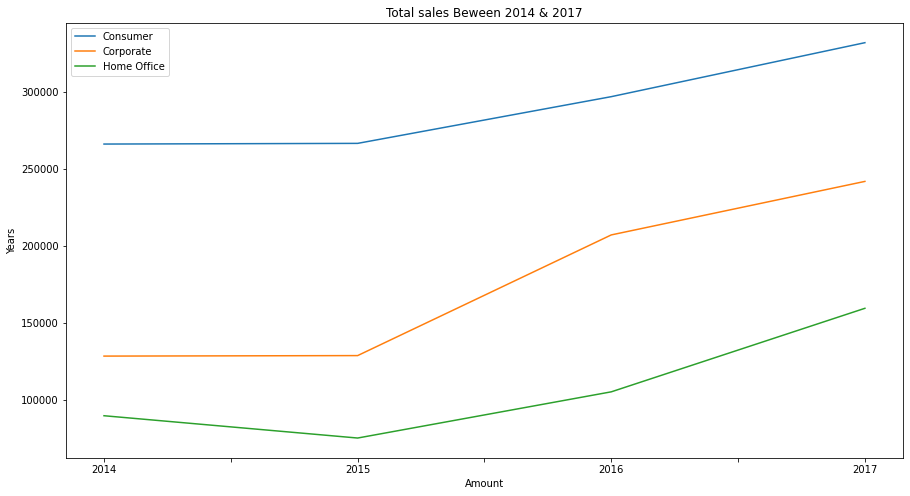

In [58]:
df_anual_sales.plot(
    kind = "line",
    x = "year",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Sales Beween 2014 & 2017");

In [40]:
## Group by segments and months
anual_sales_profit = sales_profit.groupby(["segment", "year"]).sum()

## split the rows using their index
consumer = anual_sales_profit.loc["Consumer",:].reset_index()
corporate = anual_sales_profit.loc["Corporate",:].reset_index()
home_office = anual_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_anual_profit = pd.concat([consumer["profit"], corporate["profit"], home_office["profit"]],axis=1)

## Rename columns and month names
df_anual_profit.columns= ["Consumer", "Corporate", "Home Office"]
df_anual_profit["year"] = ["2014", "2015", "2016", "2017"]

## Confirm changes
df_anual_profit.set_index("year")

,Consumer,Corporate,Home Office
year,,,
2014,24319.8504,13513.2769,11710.8468
2015,28460.1665,20688.3248,12470.1124
2016,35770.9532,30995.1690,15029.0521
2017,45568.2391,26782.3633,21088.6672


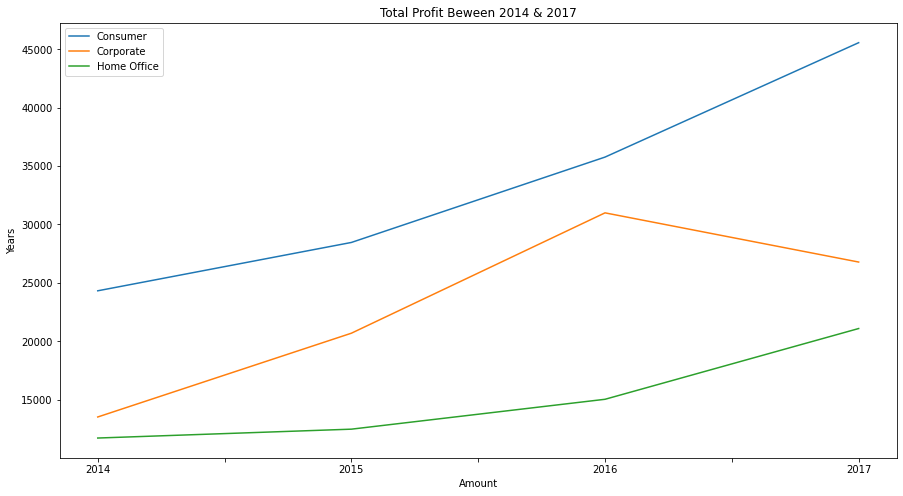

In [59]:
df_anual_profit.plot(
    kind = "line",
    x = "year",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Profit Beween 2014 & 2017");

#### Let me plot the two charts side by side for easy comparison

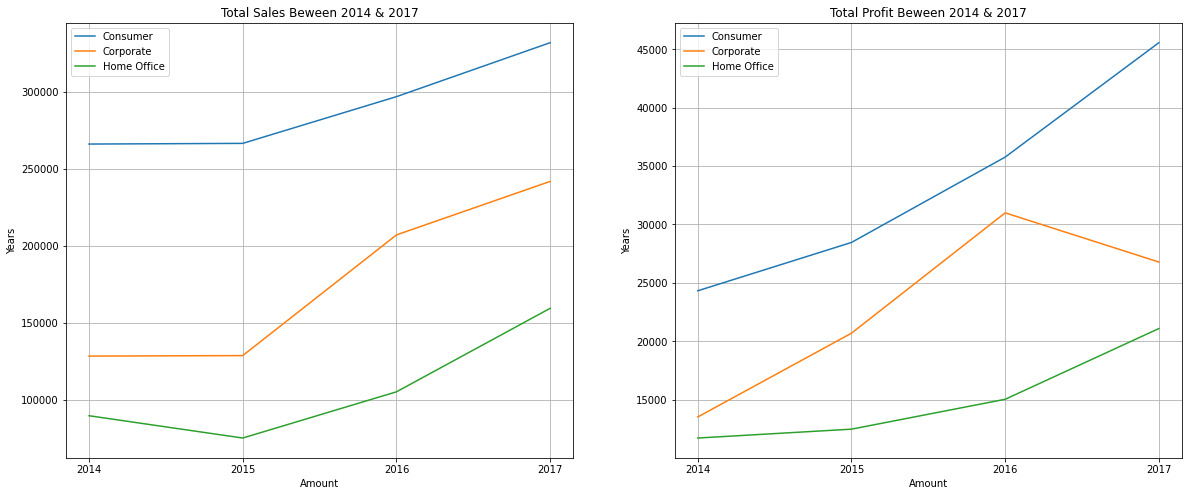

In [60]:
plt.figure(figsize=[20,8])
plt.subplot(1, 2, 1)
plt.plot(
    df_anual_sales["year"],
    df_anual_sales[["Consumer", "Corporate", "Home Office"]],
)
plt.legend(["Consumer", "Corporate", "Home Office"])
plt.grid()
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Sales Beween 2014 & 2017");

plt.subplot(1, 2, 2)
plt.plot(
    df_anual_profit["year"],
    df_anual_profit[["Consumer", "Corporate", "Home Office"]],
)
plt.legend(["Consumer", "Corporate", "Home Office"])
plt.grid()
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Profit Beween 2014 & 2017");

#### **Findings:** There was a significant change in both sales and profit between 2015 and 2016. These can be summarised in three points
- The behaviour of casual buyers is unpredictable. Thus, depending too much on they might be a greater risk
- The percentage increase in profit seems to be low when compared with the rate at which sales increased for corporate buyers and even dropped after sales decreased
- Although home office buyers still account for the smallest percentage of the buyers, sales increases mean profit increases.


#### Ask:
- How the is purchasing pattern differ for each segment on monthly basis?
- Is the any product a segment buy more than the other?

In [62]:
## Calculate the monthly sales for each segment

## Group by segments and months
monthly_sales = sales.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_sales.loc["Consumer",:].reset_index()
corporate = monthly_sales.loc["Corporate",:].reset_index()
home_office = monthly_sales.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer["sales"], corporate["sales"], home_office["sales"]],axis=1)

## Rename columns and month names
df_combined.columns= ["Consumer", "Corporate", "Home Office"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,Consumer,Corporate,Home Office
month,,,
Jan,50441.2906,26790.3480,17693.1970
Feb,33826.1760,14575.0670,11350.0084
Mar,89174.7070,58239.9132,57590.8686
Apr,54845.1895,49233.1636,33683.7755
May,86932.7144,47289.0323,20807.0650
Jun,82910.1803,40858.5370,28949.9620
Jul,81769.7730,46919.2060,18549.1180
Aug,82319.8063,57529.4477,19194.8090
Sep,185055.9196,74020.2213,48573.8048


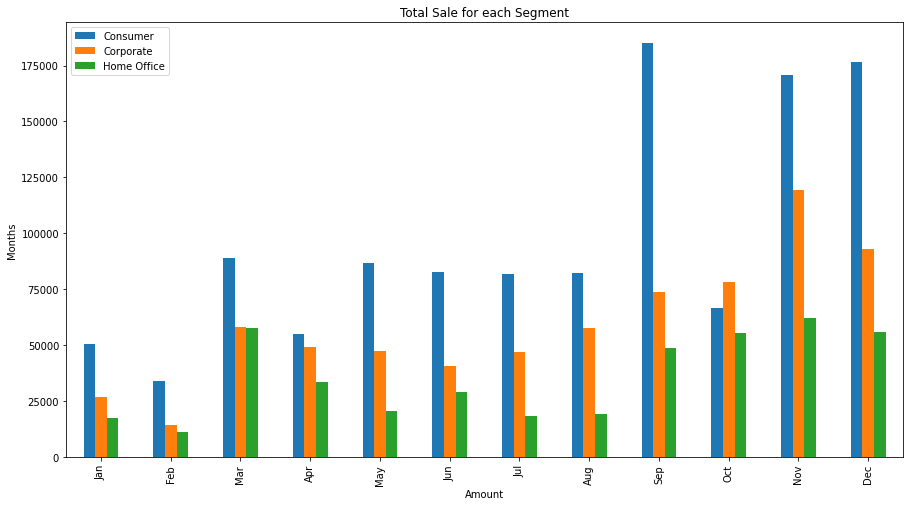

In [63]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Sales for each Segment");

In [65]:
## Calculate the monthly sales for each segment

## Group by segments and months
monthly_profit = profit.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_profit.loc["Consumer",:].reset_index()
corporate = monthly_profit.loc["Corporate",:].reset_index()
home_office = monthly_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer["profit"], corporate["profit"], home_office["profit"]],axis=1)

## Rename columns and month names
df_combined.columns= ["Consumer", "Corporate", "Home Office"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,Consumer,Corporate,Home Office
month,,,
Jan,3179.0966,1349.5747,4605.7748
Feb,6668.2667,2545.4077,1080.9363
Mar,18086.1212,7804.2538,2704.3122
Apr,3854.3816,7273.9416,459.1131
May,10746.1024,7831.3823,3833.8231
Jun,11917.5345,4721.3075,4646.9534
Jul,4104.3650,6868.3949,2859.9049
Aug,10264.4166,9519.0652,1993.4566
Sep,24338.3640,6059.1762,6459.9351


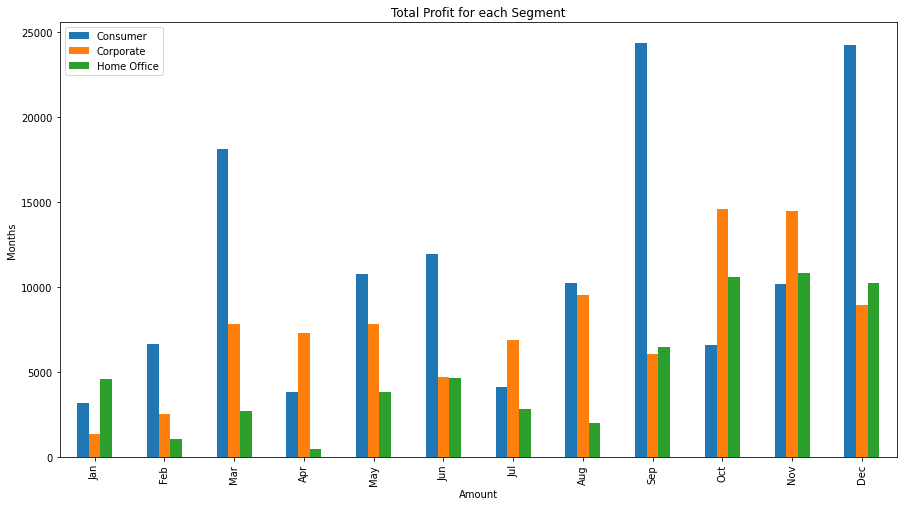

In [66]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Profit for each Segment");

In [68]:
## Combine the two on a chart

## Group by segments and months
monthly_sales_profit = sales_profit.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_sales_profit.loc["Consumer",:].reset_index()
corporate = monthly_sales_profit.loc["Corporate",:].reset_index()
home_office = monthly_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer[["sales", "profit"]], corporate[["sales", "profit"]], home_office[["sales", "profit"]]],axis=1)

## Rename columns and month names
df_combined.columns= ["cons_sales", "cons_profit", "corp_sales", "corp_profit", "home_sales", "home_profit"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,cons_sales,cons_profit,corp_sales,corp_profit,home_sales,home_profit
month,,,,,,
Jan,50441.2906,3179.0966,26790.3480,1349.5747,17693.1970,4605.7748
Feb,33826.1760,6668.2667,14575.0670,2545.4077,11350.0084,1080.9363
Mar,89174.7070,18086.1212,58239.9132,7804.2538,57590.8686,2704.3122
Apr,54845.1895,3854.3816,49233.1636,7273.9416,33683.7755,459.1131
May,86932.7144,10746.1024,47289.0323,7831.3823,20807.0650,3833.8231
Jun,82910.1803,11917.5345,40858.5370,4721.3075,28949.9620,4646.9534
Jul,81769.7730,4104.3650,46919.2060,6868.3949,18549.1180,2859.9049
Aug,82319.8063,10264.4166,57529.4477,9519.0652,19194.8090,1993.4566
Sep,185055.9196,24338.3640,74020.2213,6059.1762,48573.8048,6459.9351


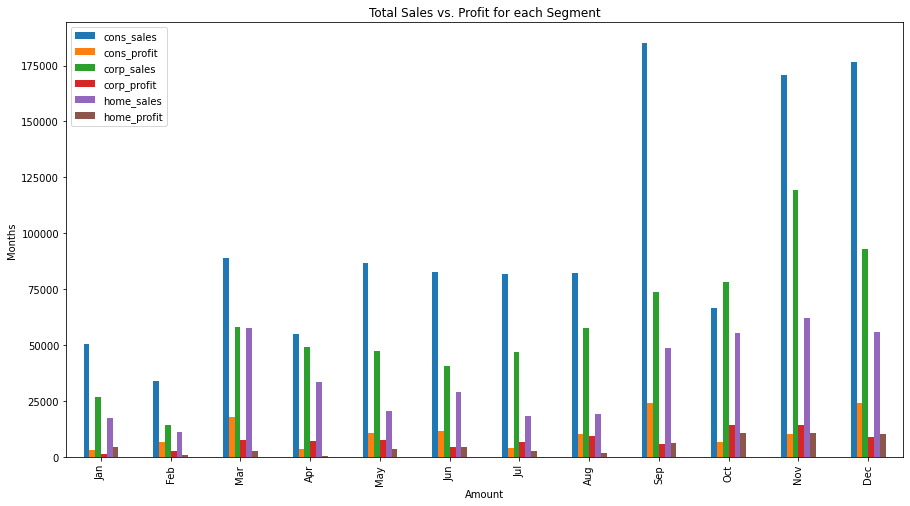

In [69]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["cons_sales", "cons_profit", "corp_sales", "corp_profit", "home_sales", "home_profit"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Sales vs. Profit for each Segment");

#### **Findings:** 
Casual buyers have been in the lead throughout the month except for October. The drastic change in October will likely be due to them not buying as they wait for giveaways in November (Black Friday) and December. Thus, although there is an increase in total sales and a bit of profit within this period, the per cent increment is not complementary for the two. While both sales and profit increased for corporate and office customers, only sales and not profit increased for casual buyers. We can see that casual buyers only took advantage of the period.

#### Ask:
For future findings will may what to understand better for example; Normalizing sales for each segment, which product each segment purchase more?

In [70]:
## Group by segments and categoty
categories = df_clean[["segment", "category", "sub_category"]]
df_categories = categories.groupby(["segment", "category"]).count()

## split the rows using their index
consumer = df_categories.loc["Consumer",:].reset_index()
corporate = df_categories.loc["Corporate",:].reset_index()
home_office = df_categories.loc["Home Office",:].reset_index()

## Combine the tables
df_categories = pd.concat([consumer["sub_category"], corporate["sub_category"], home_office["sub_category"]],axis=1)

# ## Rename columns and month names
df_categories.columns= ["Consumer", "Corporate", "Home Office"]
## Normalize the values
df_categories = df_categories / df_categories.sum()
df_categories["category"] = ["Furniture", "Office Supplies", "Technology"]

## Confirm changes
df_categories.set_index("category")

,Consumer,Corporate,Home Office
category,,,
Furniture,0.169516,0.175317,0.165295
Office Supplies,0.636889,0.630159,0.633745
Technology,0.193595,0.194524,0.200960


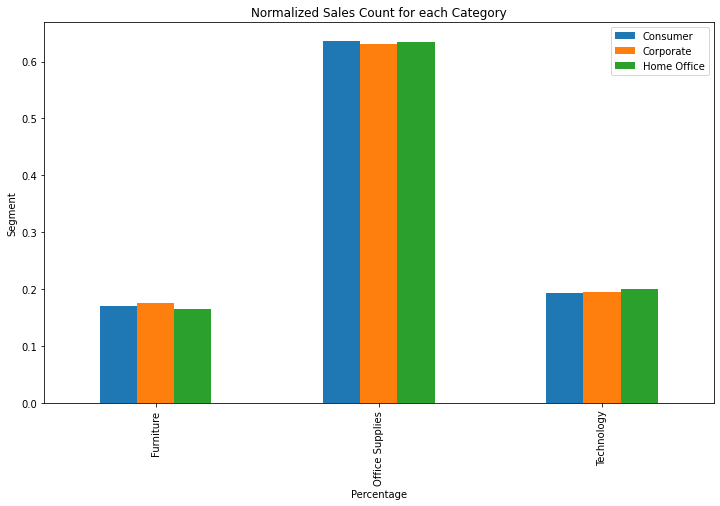

In [71]:
## Visualize. If this return an error message, run the code before it

df_categories.plot(
    kind = "bar",
    x = "category",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(12, 7)
)
plt.xlabel("Percentage")
plt.ylabel("Segment")
plt.title("Normalized Sales Count for each Category");

These are normalised values. It does not calculate the total sale for each category for all the segments together; instead, it calculates the percentage of the sale for each category on average; they consume each category at the same proportion with a slight difference. Corporate customers buy more furniture than other items, etc. Knowing this will help in advertisement planning.

<a id="task-3"></a>
## **Task 3:** Critical reflection report. Read [here](https://drive.google.com/file/d/1Tr54lBGeNtr7FA0ki6kbVc8d9vEvj97i/view?usp=sharing)
